# Group assignment Week 3 - Kai Watanabe
In this assignment, I will go through the race distribution of NYC to determine whether race is a contributing factor to the general attitude towards COVID vaccinations on Twitter. I chose to study NYC because after counting the number of tweets from our twitter dataset and then sorting it by location, we discovered that London and NYC are some of the most populated locations. The data is from census reporter, and can be viewed here: https://censusreporter.org/data/table/?table=B03002&geo_ids=16000US3651000,140|16000US3651000&primary_geo_id=16000US3651000#

## Importing libraries

In [62]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## reading in dataset

In [63]:
# load a data file
# note the relative filepath! where is this file located?
gdf = gpd.read_file('Data/acs2019_5yr_B03002_14000US36061000100.geojson')

## setting up easier display

Lets allow max columsna nd max rows so that we can get a better understanding of the dataset

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
gdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
165,14000US36061015900,"Census Tract 159, New York, NY",9517.0,716.0,8874.0,706.0,7218.0,730.0,299.0,203.0,0.0,17.0,1027.0,343.0,0.0,17.0,125.0,198.0,205.0,118.0,0.0,17.0,205.0,118.0,643.0,328.0,265.0,141.0,29.0,45.0,0.0,17.0,0.0,17.0,0.0,17.0,254.0,201.0,95.0,155.0,95.0,155.0,0.0,17.0,"MULTIPOLYGON (((-73.99571 40.78254, -73.99477 ..."


In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             289 non-null    object  
 1   name              289 non-null    object  
 2   B03002001         289 non-null    float64 
 3   B03002001, Error  289 non-null    float64 
 4   B03002002         289 non-null    float64 
 5   B03002002, Error  289 non-null    float64 
 6   B03002003         289 non-null    float64 
 7   B03002003, Error  289 non-null    float64 
 8   B03002004         289 non-null    float64 
 9   B03002004, Error  289 non-null    float64 
 10  B03002005         289 non-null    float64 
 11  B03002005, Error  289 non-null    float64 
 12  B03002006         289 non-null    float64 
 13  B03002006, Error  289 non-null    float64 
 14  B03002007         289 non-null    float64 
 15  B03002007, Error  289 non-null    float64 
 16  B03002008         

## cleaning data

We're going to drop the first row, and also elliminate unneccesary columns. We are uninterested in looking at data regarding hispanics who are also mixed, so we will take these columsn away.

In [66]:
gdf = gdf.drop([0])

In [67]:
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US36061000100,"Census Tract 1, New York, NY",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."
2,14000US36061000201,"Census Tract 2.01, New York, NY",2750.0,226.0,1645.0,241.0,288.0,164.0,182.0,150.0,0.0,12.0,1173.0,204.0,0.0,12.0,0.0,12.0,2.0,4.0,0.0,12.0,2.0,4.0,1105.0,197.0,170.0,120.0,230.0,183.0,0.0,12.0,21.0,33.0,0.0,12.0,532.0,240.0,152.0,113.0,29.0,34.0,123.0,98.0,"MULTIPOLYGON (((-73.98717 40.71431, -73.98608 ..."
3,14000US36061000202,"Census Tract 2.02, New York, NY",7773.0,831.0,4735.0,753.0,1543.0,328.0,1550.0,626.0,47.0,70.0,1494.0,518.0,0.0,17.0,22.0,35.0,79.0,83.0,0.0,17.0,79.0,83.0,3038.0,613.0,1662.0,477.0,118.0,95.0,40.0,63.0,85.0,109.0,0.0,17.0,892.0,519.0,241.0,171.0,49.0,46.0,192.0,164.0,"MULTIPOLYGON (((-73.98534 40.71446, -73.98471 ..."
4,14000US36061000500,"Census Tract 5, New York, NY",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-74.03294 40.68778, -74.02628 ..."
5,14000US36061000600,"Census Tract 6, New York, NY",9838.0,1024.0,7050.0,702.0,460.0,232.0,715.0,143.0,86.0,102.0,5789.0,690.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,2788.0,883.0,623.0,428.0,0.0,17.0,45.0,74.0,71.0,89.0,0.0,17.0,1506.0,616.0,543.0,580.0,0.0,17.0,543.0,580.0,"MULTIPOLYGON (((-73.99256 40.71439, -73.99213 ..."


In [68]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [69]:
# columns to drop B03002009,B03002010,B03002011,B03002020,B03002021 
columnsToKeep = [
    'geoid',
    'name',
    'B03002001',
    'B03002002',
    'B03002003',
    'B03002004',
    'B03002005',
    'B03002006',
    'B03002007',
    'B03002008',
    'B03002009',
    'B03002012',
    'geometry'
]

gdf = gdf[columnsToKeep]

In [71]:
gdf.columns = [
'geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White Alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry'
]


In [72]:
gdf.head()

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
1,14000US36061000100,"Census Tract 1, New York, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."
2,14000US36061000201,"Census Tract 2.01, New York, NY",2750.0,1645.0,288.0,182.0,0.0,1173.0,0.0,0.0,2.0,1105.0,"MULTIPOLYGON (((-73.98717 40.71431, -73.98608 ..."
3,14000US36061000202,"Census Tract 2.02, New York, NY",7773.0,4735.0,1543.0,1550.0,47.0,1494.0,0.0,22.0,79.0,3038.0,"MULTIPOLYGON (((-73.98534 40.71446, -73.98471 ..."
4,14000US36061000500,"Census Tract 5, New York, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-74.03294 40.68778, -74.02628 ..."
5,14000US36061000600,"Census Tract 6, New York, NY",9838.0,7050.0,460.0,715.0,86.0,5789.0,0.0,0.0,0.0,2788.0,"MULTIPOLYGON (((-73.99256 40.71439, -73.99213 ..."


## confirming that our data mathematically makes sense

We need to make sure we didn't delete any excess columns, so we will do some simple addition

In [74]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
72,14000US36061007300,"Census Tract 73, New York, NY",5759.0,5323.0,5036.0,56.0,0.0,231.0,0.0,0.0,0.0,436.0,"MULTIPOLYGON (((-74.00657 40.73199, -74.00650 ..."


In [75]:
random_tract.iloc[0]['Total']

5759.0

In [76]:
print('Non Hispanic + Hispanic: ' + str(random_tract.iloc[0]['Not Hispanic or Latino'] + random_tract.iloc[0]['Hispanic or Latino']))

Non Hispanic + Hispanic: 5759.0


In [78]:
# Adding hispanic latino + every race category

print(
random_tract.iloc[0]['Hispanic or Latino']+
random_tract.iloc[0]['White Alone']+
random_tract.iloc[0]['Black or African American alone']+
random_tract.iloc[0]['American Indian and Alaska Native alone']+
random_tract.iloc[0]['Asian alone']+
random_tract.iloc[0]['Native Hawaiian and Other Pacific Islander alone']+
random_tract.iloc[0]['Some other race alone']+
random_tract.iloc[0]['Two or more races']   
)


5759.0


## looking more closely at race data

Now that we know our dataset is accurate, lets plot the frequency of amount of people per race.

In [79]:
gdf['Total'].describe()

count      288.000000
mean      5666.642361
std       3146.929925
min          0.000000
25%       3405.250000
50%       5408.500000
75%       7765.500000
max      16594.000000
Name: Total, dtype: float64

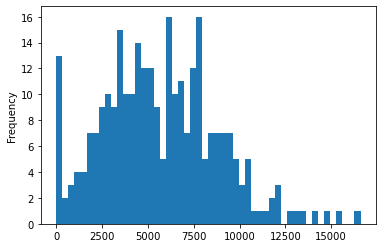

In [80]:
gdf['Total'].plot.hist(bins=50)

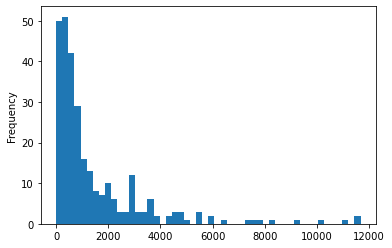

In [89]:
gdf['Hispanic or Latino'].plot.hist(bins=50)

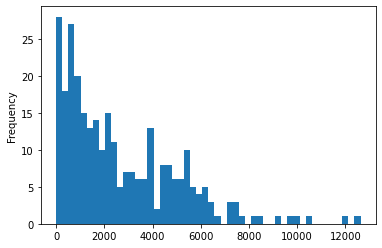

In [82]:
gdf['White Alone'].plot.hist(bins=50)

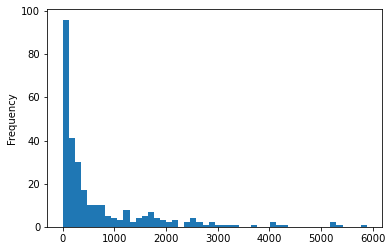

In [83]:
gdf['Black or African American alone'].plot.hist(bins=50)

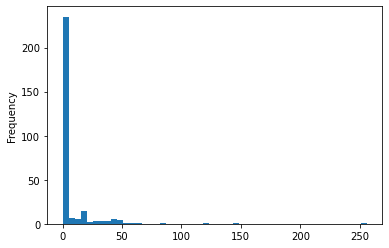

In [84]:
gdf['American Indian and Alaska Native alone'].plot.hist(bins=50)

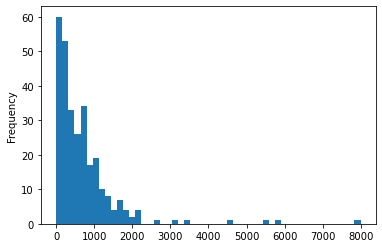

In [85]:
gdf['Asian alone'].plot.hist(bins=50)

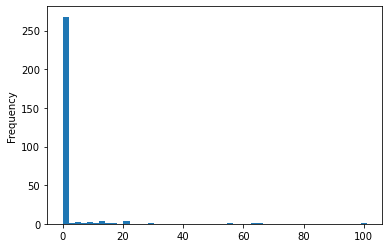

In [86]:
gdf['Native Hawaiian and Other Pacific Islander alone'].plot.hist(bins=50)

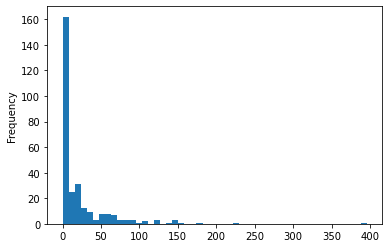

In [87]:
gdf['Some other race alone'].plot.hist(bins=50)

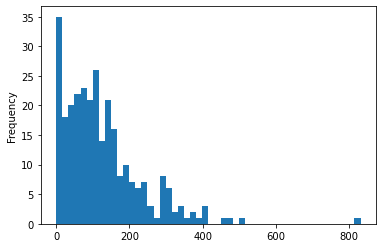

In [88]:
gdf['Two or more races'].plot.hist(bins=50)

From here we can conclude that NYC largely consists of white, hispanic, black, asian, and mixed communities. So far, this seems to be accurate.

## creating percent distributions

Lets see how many people of each race category there are in contrast to the total population

In [90]:
# output columns
list(gdf)

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White Alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [91]:
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Non Hispanic'] = gdf['Not Hispanic or Latino']/gdf['Total']*100
gdf['Percent Hispanic'] = gdf['Hispanic or Latino']/gdf['Total']*100
gdf['Percent Non Hispanic White'] = gdf['White Alone']/gdf['Total']*100
gdf['Percent Non Hispanic Black'] = gdf['Black or African American alone']/gdf['Total']*100
gdf['Percent Non Hispanic American Indian and Alaska Native'] = gdf['American Indian and Alaska Native alone']/gdf['Total']*100
gdf['Percent Non Hispanic Asian'] = gdf['Asian alone']/gdf['Total']*100
gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf['Native Hawaiian and Other Pacific Islander alone']/gdf['Total']*100
gdf['Percent Non Hispanic Some other race'] = gdf['Some other race alone']/gdf['Total']*100
gdf['Percent Non Hispanic Two or more races'] = gdf['Two or more races']/gdf['Total']*100

In [92]:
gdf.sample(5)

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
206,14000US36061019800,"Census Tract 198, New York, NY",2645.0,2155.0,522.0,1238.0,47.0,221.0,0.0,48.0,79.0,490.0,"MULTIPOLYGON (((-73.94569 40.80452, -73.94524 ...",81.474480,18.525520,19.735350,46.805293,1.776938,8.355388,0.0,1.814745,2.986767
210,14000US36061020102,"Census Tract 201.02, New York, NY",4137.0,3520.0,1135.0,2008.0,0.0,280.0,0.0,0.0,97.0,617.0,"MULTIPOLYGON (((-73.95825 40.80471, -73.95818 ...",85.085811,14.914189,27.435340,48.537588,0.000000,6.768190,0.0,0.000000,2.344694
274,14000US36061028300,"Census Tract 283, New York, NY",7949.0,2467.0,1537.0,440.0,17.0,396.0,0.0,8.0,69.0,5482.0,"MULTIPOLYGON (((-73.93263 40.85672, -73.93204 ...",31.035350,68.964650,19.335766,5.535287,0.213863,4.981759,0.0,0.100642,0.868034
182,14000US36061017402,"Census Tract 174.02, New York, NY",2375.0,1573.0,388.0,926.0,0.0,208.0,0.0,22.0,29.0,802.0,"MULTIPOLYGON (((-73.94910 40.79706, -73.94879 ...",66.231579,33.768421,16.336842,38.989474,0.000000,8.757895,0.0,0.926316,1.221053
192,14000US36061018500,"Census Tract 185, New York, NY",4893.0,4616.0,3432.0,447.0,0.0,570.0,0.0,65.0,102.0,277.0,"MULTIPOLYGON (((-73.96987 40.79474, -73.96941 ...",94.338851,5.661149,70.141018,9.135500,0.000000,11.649295,0.0,1.328428,2.084611


## Comparing overlap between communities
How divided are communities in NYC? What is the general overlap of communities? These maps help create a better understanding.

Text(0.5, 1.0, 'Percent Hispanic')

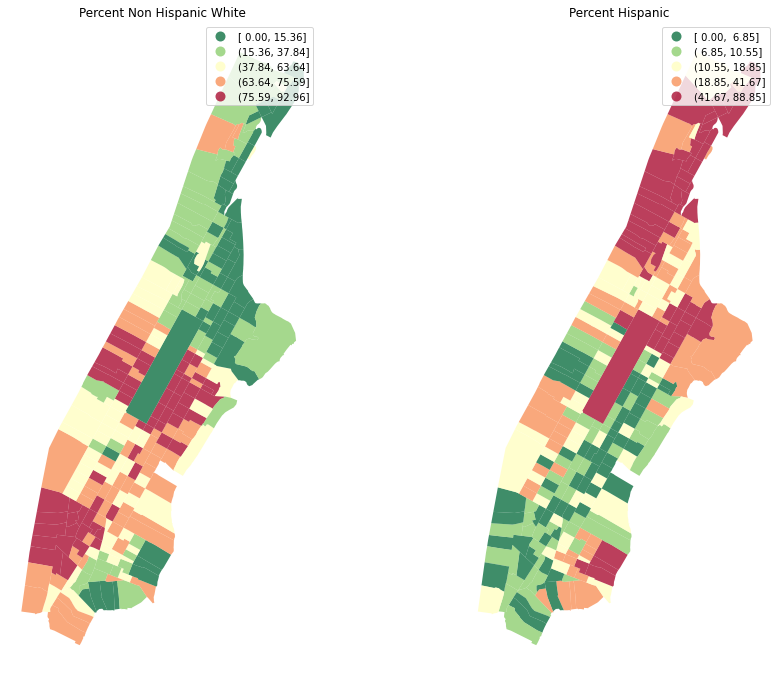

In [98]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non Hispanic White")

# spatial lag map on the right
gdf.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Hispanic")

Looking at this map, we can see that the regions in which hispanic and white communities occupy each other is almost completely opposite. There is one region at the top where both regions are colored light orange.

Additionally, the bottom left areas of both maps are polor opposites in percentages. There is a large white population there and a very small hispanic population. 

Lets add a base map to see where this is

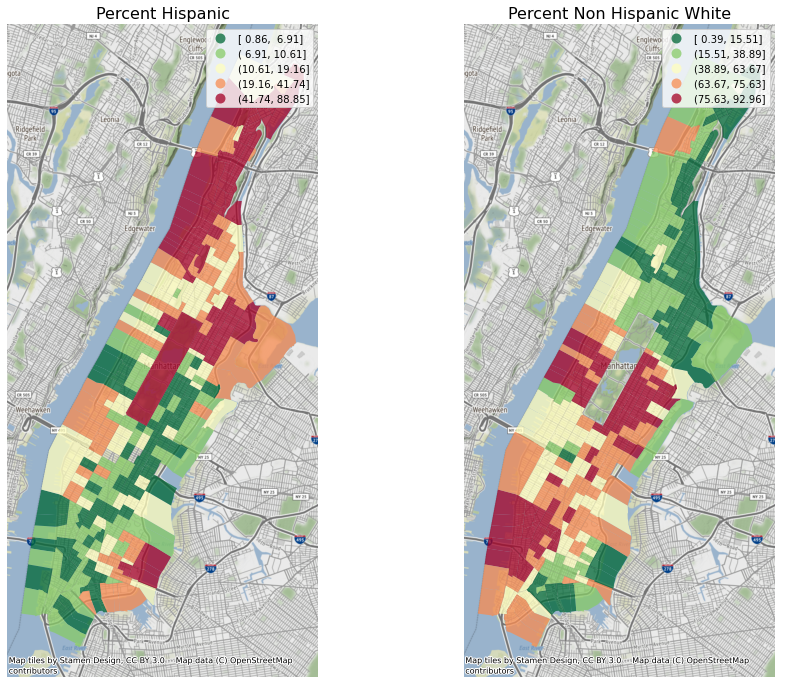

In [100]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Hispanic']>0].plot(
            column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
# set a title
ax1.set_title('Percent Hispanic',fontsize=16)

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Non Hispanic White'] > 0].plot(
            column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot,
            legend=True
           )

ax2.axis("off")
# set a title
ax2.set_title('Percent Non Hispanic White',fontsize=16)


# add a basemap
ctx.add_basemap(ax1)
ctx.add_basemap(ax2)

We can see that the top area corresponds with Hudson Heights.
Looking at census data on Hudson heights, here's what we can see:

Total Population	1,851
Male Population	898
Female Population	953

Median Age	30
Citizen US Born	1,655
Citizen not US Born	119

Average Household Income	$ 74,641.95
Median Household Income	$ 63,457.00
People below Poverty Level	292
People above Poverty Level	1,514

======================

We can also see that the bottom area corresponds with Tribeca.

Total Population 17,134
Male Population	50%
Female Population	50%

Education Levels              
Master's degree or higher 40%
Bachelor's degree 48%
Some college or associate's degree 6%

Median Household Income
$ 210,069

Household Income Brackets

<$25k           6%

$ 25 - $44k      5%

$ 45-$74k        6%

$ 75-$149k      18%

$ 150k+         64%

====================
Finally, here is the income distribution of the entire area

Under 50k    31%

50k-100k    20%

100k-200k    23%

over 200k     25%

This leads us to believe that perhaps middle income communities of whites and hispanics may live together. And areas of high income are largely exclusive to white communities.

## Conclusion 

Data leads us to believe that communities in NYC tend to be very clustered, and that median household income communitites tend to have higher diversity. Its important to keep in mind that the medium household income is the smallest group, and therefore the tweets from NYC may be biased towards white communitites. In the future, we would like to compare these statistics to other big cities